In [105]:
# Import libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

In [106]:
#Assign the website url to attribute
url = "https://www.calculator.net/currency-calculator.html"

In [107]:
#Open the webpage
page = urlopen(url)
page

In [108]:
#Read the webpage
html_bytes = page.read()
html = html_bytes.decode("utf-8")


In [109]:
# Read the url using Beautiful Soup and print to inspect the html structure
soup=BeautifulSoup(html)
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Currency Calculator
  </title>
  <meta content="Free currency calculator to convert between most of the global currencies using live or custom exchange rates. Also, check the latest exchange rate." name="description"/>
  <link href="/style.css" rel="stylesheet"/>
  <script async="" src="//d26tpo4cm8sb6k.cloudfront.net/js/common.js">
  </script>
  <link href="//d26tpo4cm8sb6k.cloudfront.net/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="//d26tpo4cm8sb6k.cloudfront.net/icon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="//d26tpo4cm8sb6k.cloudfront.net/icon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link href="/manifest.json" rel="manifest"/>
 </head>
 <body>
  <div id="headerout">
   <div id="header">
    <div id="logo">
     <a href="/">
      <img height="22" src="//d26tpo4cm8sb6k.cloudfront.net/img/svg/calculator-white.svg" width="208"/>
     </a>
    </div>
   </di

In [110]:
# The required data is available within the tag script. 
import re
arr = soup.find_all('script')[2].get_text() #Extract the tag script
arr
start = arr.find("listsArrayData = [") + len("listsArrayData = [") # Identify the starting position
end = arr.find("];var majorCurrenciesIndex") # Identify the end position
substring = arr[start:end] # Extract the data in between
print(substring) # Print the extracted data

["AED",3.673],["AFN",95.000011],["ALL",106.7],["AMD",485.152567],["ANG",1.802765],["AOA",522.284],["ARS",105.356593],["AUD",1.414347],["AWG",1.8005],["AZN",1.7],["BAM",1.704405],["BBD",2],["BDT",85.935082],["BGN",1.710432],["BHD",0.376927],["BIF",2016],["BMD",1],["BND",1.344892],["BOB",6.886969],["BRL",5.3285],["BSD",1],["BTC",0.00002417169],["BTN",74.730739],["BWP",11.557409],["BYN",2.577221],["BZD",2.016305],["CAD",1.27563],["CDF",2015],["CHF",0.925003],["CLF",0.030026],["CLP",828.5],["CNH",6.3648],["CNY",6.361],["COP",3966.295047],["CRC",643.665857],["CUC",1],["CUP",25.75],["CVE",97.4],["CZK",21.29035],["DJF",177.675],["DKK",6.502],["DOP",57.65],["DZD",140.600871],["EGP",15.731878],["ERN",15.00001],["ETB",50.1],["EUR",0.873427],["FJD",2.139],["FKP",0.738672],["GBP",0.738672],["GEL",2.98],["GGP",0.738672],["GHS",6.41],["GIP",0.738672],["GMD",53.025],["GNF",9070],["GTQ",7.692274],["GYD",209.182381],["HKD",7.788175],["HNL",24.609999],["HRK",6.5748],["HTG",101.592591],["HUF",310.02],["I

In [111]:
# splitting using split()
delim = "],"
temp = substring.split(delim) # 
df = pd.DataFrame (temp, columns = ['col']) # Convert the data into a dataframe
df

,col
0,"[""AED"",3.673"
1,"[""AFN"",95.000011"
2,"[""ALL"",106.7"
3,"[""AMD"",485.152567"
4,"[""ANG"",1.802765"
...,...
164,"[""XPT"",0.00097278"
165,"[""YER"",250.249937"
166,"[""ZAR"",15.46027"
167,"[""ZMW"",18.365817"


In [112]:
# Split the dataframe field into multiple fields 
delimiter= ','
ForexRate= df['col'].str.split(delimiter, expand=True)
ForexRate.columns =['Currency', 'ExchangeRate']  # Assign column headers
ForexRate

,Currency,ExchangeRate
0,"[""AED""",3.673
1,"[""AFN""",95.000011
2,"[""ALL""",106.7
3,"[""AMD""",485.152567
4,"[""ANG""",1.802765
...,...,...
164,"[""XPT""",0.00097278
165,"[""YER""",250.249937
166,"[""ZAR""",15.46027
167,"[""ZMW""",18.365817


In [113]:
# Remove the special characters
ForexRate.Currency=ForexRate.Currency.str.replace('[','') 
ForexRate.Currency=ForexRate.Currency.str.replace('"','')
ForexRate.ExchangeRate=ForexRate.ExchangeRate.str.replace(']','')
ForexRate


,Currency,ExchangeRate
0,AED,3.673
1,AFN,95.000011
2,ALL,106.7
3,AMD,485.152567
4,ANG,1.802765
...,...,...
164,XPT,0.00097278
165,YER,250.249937
166,ZAR,15.46027
167,ZMW,18.365817


In [115]:
#convert the datatype of ExchangeRate  into float
ForexRate.dtypes
ForexRate.ExchangeRate = ForexRate.ExchangeRate.astype(float)
ForexRate

,Currency,ExchangeRate
0,AED,3.673000
1,AFN,95.000011
2,ALL,106.700000
3,AMD,485.152567
4,ANG,1.802765
...,...,...
164,XPT,0.000973
165,YER,250.249937
166,ZAR,15.460270
167,ZMW,18.365817


In [116]:
#Split the Dataframe into countries with currency value higher than USD and lower than USD
higherThanUsd = ForexRate[ForexRate["ExchangeRate"]< 1]
lowerThanUsd= ForexRate[ForexRate["ExchangeRate"]> 1]
higherThanUsd

,Currency,ExchangeRate
14,BHD,0.376927
21,BTC,0.000024
28,CHF,0.925003
29,CLF,0.030026
46,EUR,0.873427
48,FKP,0.738672
49,GBP,0.738672
51,GGP,0.738672
53,GIP,0.738672
65,IMP,0.738672


In [117]:
import os

os.chdir("/Users/manikantanvenkataraman/Downloads") # Change directory
os.getcwd()

'/Users/manikantanvenkataraman/Downloads'

In [118]:
# Read an excel file with Currency code and country name
countryCurrency=pd.read_excel("list_of_currency_in_world_by_country-750j.xlsx")
countryCurrency

,CountryName,Alpha2Code,CurrencyName,CurrencyCodeA,CurrencyCodeN
0,AFGHANISTAN,AF,Afghani,AFN,971.0
1,ALBANIA,AL,Lek,ALL,8.0
2,ALGERIA,DZ,Algerian Dinar,DZD,12.0
3,AMERICAN SAMOA,AS,US Dollar,USD,840.0
4,ANDORRA,AD,Euro,EUR,978.0
...,...,...,...,...,...
265,Venezuela,NaN,Venezuelan bolívar,VEF,NaN
266,Vietnam,NaN,Vietnamese đồng,VND,NaN
267,Wallis and Futuna,NaN,CFP franc,XPF,NaN
268,Yemen,NaN,Yemeni rial,YER,NaN


In [121]:
# Join the two dataframes
forexhigherThanUsd = pd.merge(higherThanUsd, countryCurrency, how='inner', left_on = 'Currency', right_on = 'CurrencyCodeA')
forexhigherThanUsd= forexhigherThanUsd[['Currency', 'ExchangeRate','CountryName']]
forexhigherThanUsd

,Currency,ExchangeRate,CountryName
0,BHD,0.376927,BAHRAIN
1,CHF,0.925003,LIECHTENSTEIN
2,CHF,0.925003,SWITZERLAND
3,CLF,0.030026,CHILE
4,EUR,0.873427,ANDORRA
5,EUR,0.873427,AUSTRIA
6,EUR,0.873427,BELGIUM
7,EUR,0.873427,FINLAND
8,EUR,0.873427,FRANCE
9,EUR,0.873427,FRENCH GUIANA


In [122]:
# Transform the contry name data into upper case
forexhigherThanUsd.CountryName = forexhigherThanUsd['CountryName'].str.upper()
forexhigherThanUsd



,Currency,ExchangeRate,CountryName
0,BHD,0.376927,BAHRAIN
1,CHF,0.925003,LIECHTENSTEIN
2,CHF,0.925003,SWITZERLAND
3,CLF,0.030026,CHILE
4,EUR,0.873427,ANDORRA
5,EUR,0.873427,AUSTRIA
6,EUR,0.873427,BELGIUM
7,EUR,0.873427,FINLAND
8,EUR,0.873427,FRANCE
9,EUR,0.873427,FRENCH GUIANA


,Currency,ExchangeRate,CountryName
0,BHD,0.376990,BAHRAIN
1,CHF,0.924984,LIECHTENSTEIN
2,CHF,0.924984,SWITZERLAND
3,CLF,0.030026,CHILE
4,EUR,0.873012,ANDORRA
5,EUR,0.873012,AUSTRIA
6,EUR,0.873012,BELGIUM
7,EUR,0.873012,FINLAND
8,EUR,0.873012,FRANCE
9,EUR,0.873012,FRENCH GUIANA


In [97]:
# Remove duplicates in the dataframe
forexhigherThanUsd = forexhigherThanUsd.drop_duplicates()
forexhigherThanUsd

,Currency,ExchangeRate,CountryName
0,BHD,0.376990,BAHRAIN
1,CHF,0.924984,LIECHTENSTEIN
2,CHF,0.924984,SWITZERLAND
3,CLF,0.030026,CHILE
4,EUR,0.873012,ANDORRA
5,EUR,0.873012,AUSTRIA
6,EUR,0.873012,BELGIUM
7,EUR,0.873012,FINLAND
8,EUR,0.873012,FRANCE
9,EUR,0.873012,FRENCH GUIANA


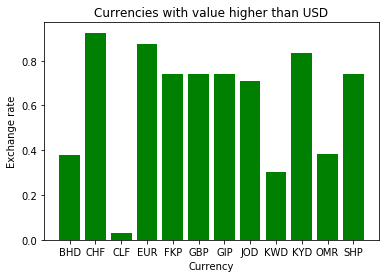

In [123]:
# Plot the forex rates using pyplot

import matplotlib.pyplot as plt

plt.bar(forexhigherThanUsd.Currency, forexhigherThanUsd.ExchangeRate, color='green')
plt.xlabel("Currency")
plt.ylabel("Exchange rate")
plt.title("Currencies with value higher than USD")

plt.show()